# Начнём

# Шаг 1. *Откроем и изучим датафрейм*

Импортируем Pandas и прочитаем данные из файла

In [185]:
import pandas as pd

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal='.')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [186]:
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Всё отлично.

# Шаг 2. *Предобработка данных*

Проверим наличие дубликатов, чтобы сразу от них избавиться.

In [187]:
df.duplicated().sum()

0

Отлично.

Теперь заполним пропуски в колонке **"Балконы"** нулями.

In [188]:
df['balcony'] = df['balcony'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Сработало!

Рассмотрим высоту потолков и то, какие там есть значения.

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

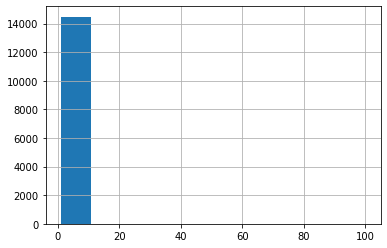

In [189]:
display(df['ceiling_height'].describe())
df['ceiling_height'].hist()

Максимальное значение - 100 метров. Тутявно что-то не то...

При этом третий квартиль - 2.8 метров, то есть 75% всех данных менее 3-х метров. Но минимальная высота потолков - 1 метр. Посмотрим, сколько значений высоты потолков менее 2-х метров и больше 7 (предположим такой максимум исходя из того, что в самых шикарных квартирах такое возможно).

In [190]:
print(df[df['ceiling_height'] < 2]['ceiling_height'].count())
print(df[df['ceiling_height'] > 7]['ceiling_height'].count())

3
29


Теперь рассмотрим гистограмму значений до 10-тиметров.

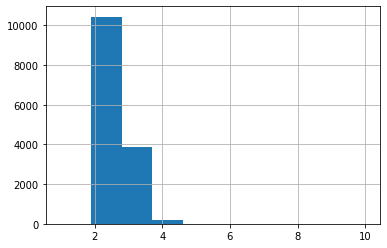

In [191]:
df['ceiling_height'].hist(range=(1, 10), bins=10)

Всё так. Теперь посмотрим на картину от 10 до 100 метров.

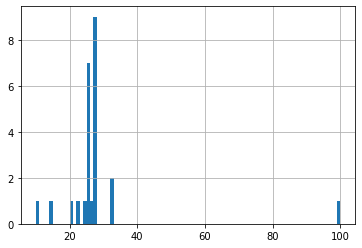

In [192]:
df['ceiling_height'].hist(range=(10, 100), bins=90)

Таких значений очень мало.

Избавимся от некорректных записей, которые меньше 2-х метров и выше 7-ми.

In [193]:
df = df.query('2 < ceiling_height < 7')

В информации о датафрейме, столбец **first_day_exposition** имеет тип даных **object**. Исправим его на **datetime**, так как это явно ошибка, и это е даст нам работать с данными, в т.ч. извлекать из даты месяц и год.

In [194]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
display(df['first_day_exposition'])

0       2019-03-07
4       2018-06-19
9       2017-02-26
10      2017-11-16
13      2017-07-01
           ...    
23691   2016-10-13
23693   2016-08-05
23694   2017-03-21
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 14461, dtype: datetime64[ns]

Теперь проверим количество комнат в квартирах и рассмотрим гистограмму.

count    14461.000000
mean         2.138303
std          1.099522
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

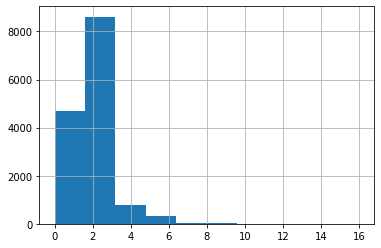

In [195]:
display(df['rooms'].describe())
df['rooms'].hist()

Почти все значения умещаются в пределах 5-ти комнат. Но максимум равен 19-ти...

Рассмотрим значения до 10-ти. Эта цифра выглядит более реально.

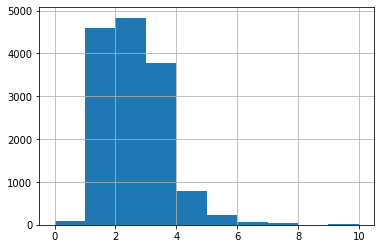

In [196]:
df['rooms'].hist(range=(0, 10))

Почти нормальное распределение.

Теперь значения от 10 до 20 комнат.

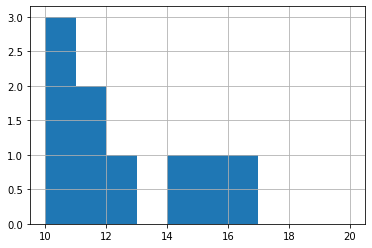

In [197]:
df['rooms'].hist(range=(10, 20))

Их не много. Возможно, это ошибка. Рассмотрим данные для более 9-ти клмнат отдельно.

In [198]:
display(df[df['rooms'] > 9])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,NaN,...,13.3,0.0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,NaN,...,16.6,0.0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,NaN,...,18.8,1.0,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,NaN,...,100.0,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,NaN,...,11.9,0.0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5.0,161.4,2,NaN,...,19.8,0.0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,NaN,...,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6.0,189.4,6,NaN,...,30.0,1.0,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,NaN,...,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


Площадь квартир соответствует количеству комнат. Сгруппируем данные по количеству комнат и посчитаем чего сколько.

In [199]:
df.groupby('rooms').count()

,total_images,last_price,total_area,first_day_exposition,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
rooms,,,,,,,,,,,,,,,,,,,,,
0,81,81,81,81,81,81,76,81,4,81,...,0,81,81,57,57,57,15,57,30,73
1,4597,4597,4597,4597,4597,4594,4342,4597,568,4597,...,4283,4597,4595,3515,3518,3518,1393,3518,1682,4034
2,4833,4833,4833,4833,4833,4830,4570,4833,632,4833,...,4578,4833,4828,3739,3748,3748,1735,3748,1770,4061
3,3781,3781,3781,3781,3781,3779,3576,3781,496,3781,...,3578,3781,3777,3138,3142,3143,1509,3143,1595,2978
4,799,799,799,799,799,799,761,799,100,799,...,756,799,796,719,721,721,396,721,423,606
5,231,231,231,231,231,231,209,231,38,231,...,205,231,231,213,214,214,138,214,133,176
6,74,74,74,74,74,73,71,74,6,74,...,69,74,74,73,73,73,50,73,49,49
7,43,43,43,43,43,43,40,43,3,43,...,40,43,43,40,41,41,27,41,26,25
8,6,6,6,6,6,6,6,6,0,6,...,5,6,6,6,6,6,6,6,4,5


196 квартир, в которых 0 комнат. Предполагаю, что это студии или открытая панировка. Проверим это через сводные таблицы.

In [200]:
df.pivot_table(index='rooms', values=['studio', 'open_plan'])

,open_plan,studio
rooms,,
0,0.111111,0.888889
1,0.000218,0.001088
2,0.000207,0.000000
3,0.000529,0.000000
4,0.001252,0.000000
5,0.000000,0.000000
6,0.000000,0.000000
7,0.000000,0.000000
8,0.000000,0.000000


Предположение подтвердилось. Проверим среднюю площадь для каждого количества комнат. Жилую и общую.

In [201]:
df.groupby('rooms')[['living_area', 'total_area']].median()

,living_area,total_area
rooms,,
0,18.0,27.30
1,17.8,36.50
2,30.5,53.00
3,45.0,72.50
4,64.0,98.50
5,94.8,150.00
6,118.4,180.75
7,149.3,217.00
8,149.8,222.65


Для квартир с 0 комнат площадь адекватная.

Но всё-таки, квартра не может быть вообще без комнат, даже если это студия. Заменим 0 на 1. Всё-таки будем считать это комнатой.

In [202]:
df['rooms'] = df['rooms'].replace(0, 1)

Отберём только квартиры, количество комнат в которых не превышает 9.

Во-первых, квартиры с бОльшим количеством комнат, всё-таки редкий случай и они будут влиять на средние и медианные значения. В нашем случае, они скорее являются выбросом.

Во-вторых, такие квартиры, всё-таки, довольно специфичны, покупателей едва ли ищут на таких массовых площадках как **Яндекс.Недвижимость**. Скорее, в узких кругах. Да и "светиться" их владельцам лишний раз, думаю, не хочется. У богачей своя тусовка, и продадут скорее кому-то из своих, или через своих (ИМХО).

In [203]:
df = df.query('rooms <= 9')

Теперь рассмотрим выборку с пустыми значениями в поле **living_area** для каждого количества комнат. Может есть какая-то ошибка и значения пустые непросто так.

In [204]:
df[df['living_area'].isnull()].groupby('rooms').mean()

,total_images,last_price,total_area,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
rooms,,,,,,,,,,,,,,,,,,
1,7.884615,4.619534e+06,41.279577,2.726692,11.246154,NaN,6.323077,0.011538,0.007692,10.997727,0.476923,29204.224490,14013.459184,0.556122,509.179487,0.724490,553.757576,133.713675
2,8.403042,6.130694e+06,56.832662,2.697490,9.402299,NaN,5.163498,0.000000,0.000000,12.995909,0.520913,29035.364641,13953.508287,0.679558,519.609195,0.900552,501.322222,165.620087
3,8.887805,8.341559e+06,79.005951,2.724244,9.014706,NaN,4.834146,0.000000,0.000000,14.131379,0.551220,27351.701987,12804.913907,0.562914,459.352941,0.953642,506.011494,144.176136
4,10.421053,1.750648e+07,120.962632,2.959211,7.842105,NaN,3.921053,0.000000,0.000000,17.555455,0.631579,29384.344828,9809.900000,1.000000,475.263158,1.066667,354.400000,213.818182
5,11.681818,3.251801e+07,192.421818,3.164545,7.181818,NaN,5.090909,0.000000,0.000000,18.522000,0.363636,27847.450000,13211.700000,1.000000,375.636364,1.100000,480.846154,383.166667
6,11.666667,2.066953e+07,195.100000,3.016667,8.666667,NaN,6.666667,0.000000,0.000000,NaN,0.000000,29444.333333,6406.666667,1.000000,531.500000,0.333333,178.000000,177.500000
7,8.666667,4.529803e+07,376.566667,3.273333,4.333333,NaN,3.000000,0.000000,0.000000,NaN,1.666667,22358.000000,3573.500000,2.000000,324.500000,1.500000,58.000000,NaN
9,12.000000,1.700000e+07,235.000000,3.000000,6.000000,NaN,3.000000,0.000000,0.000000,NaN,0.000000,24466.000000,5034.000000,1.000000,346.000000,0.000000,NaN,90.000000


Вроде всё в порядке. Напишем функцию, которая делит жилую площадь на количество комнат, чтобы узнать примерную площадь для 1 комнаты. С её помощью создадим столбец **room_area** и запросим его описание.

In [205]:
def room_count(row):
    a = row['living_area']/row['rooms']
    return a


df['room_area'] = df.apply(room_count, axis=1)
df['room_area'].describe()

count    13657.000000
mean        16.788585
std          3.962168
min          1.000000
25%         14.466667
50%         16.050000
75%         18.100000
max         68.000000
Name: room_area, dtype: float64

Отклонение небольшое, медиана примерно совпадает со средним, межквартильный размах также очень мал.

Теперь заполним пропуски в столбце **living_area** , умножив количество комнат на рассчитанное нами медианное значение площади одной комнаты.

In [206]:
df['living_area'] = df['living_area'].fillna(df['rooms'] * (df['room_area'].median()))
df['living_area'].isnull().sum()

0

Пустых значений больше не осталось.

Теперь, рассмотрим саму жилую площадь. Какие есть минимальные значения в этом столбце.

In [207]:
df['living_area'].sort_values().head(20)

13915     2.0
23574     3.0
21943     5.4
16431     6.0
19251     6.5
20994     8.0
114       8.3
2309      8.4
21505     8.5
17248     8.9
22252     9.0
4100      9.0
4542      9.0
15833     9.0
7312      9.0
1326      9.0
21908     9.8
19253    10.0
12177    10.0
10520    10.0
Name: living_area, dtype: float64

2, 3, 5 квадратных метров... Маловато для жилья, но таких записей не много. Рассмотрим другие их параметры. Ориентир возьмём 9. Уж хотя бы 3х3. Помню такую студию у приятеля, было тесновато.

In [208]:
df[df['living_area'] < 9][['rooms', 'total_area', 'living_area', 'kitchen_area']]

,rooms,total_area,living_area,kitchen_area
114,1,21.4,8.3,6.3
2309,2,62.4,8.4,41.0
13915,2,52.0,2.0,9.0
16431,1,31.0,6.0,17.0
17248,1,33.0,8.9,16.1
19251,1,33.0,6.5,18.0
20994,2,50.6,8.0,31.0
21505,1,35.3,8.5,16.1
21943,4,77.6,5.4,9.8
23574,3,139.0,3.0,16.0


Совсем странно. Кухня порой в разы больше жилой площади. Возможно, значения перепутаны. Избавимся от записей, жилая площадь в которых меньше 9-ти.

In [209]:
df = df.query('living_area >= 9')

Для пропусков названий городов, проставим **'неизвестно'**.

In [210]:
df['locality_name'] = df['locality_name'].fillna('неизвестно')

В столбце **'is_apartment'** тоже много пропусков, Посмотрим, для каких городов этот параметр равен **True**.

In [211]:
df[df['is_apartment'] == True].groupby('locality_name').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,room_area
locality_name,,,,,,,,,,,,,,,,,,,,,
Всеволожск,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,1,0
Выборг,3,3,3,3,3,3,3,3,3,3,...,2,3,0,0,0,0,0,0,2,3
Зеленогорск,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
Колпино,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Красное Село,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,0,1,0
Никольское,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,1,1
Петергоф,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,0,1
Санкт-Петербург,31,31,31,31,31,31,31,31,31,31,...,22,31,29,31,31,10,31,20,22,27
посёлок Щеглово,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,1,1


Почти все они для Санкт-Петербурга. Возможно, нам это пригодится. Оставим как есть.

Теперь взглянем на количество этажей.

In [212]:
df['floors_total'].describe()

count    14433.000000
mean        10.173422
std          6.193217
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

Максимум равен 60-ти. Таких домов, в принципе, не много в стране. Посмотрим какие ещё есть большие значения.

In [213]:
df['floors_total'].sort_values(ascending=False).head(10)

2253     60.0
16731    52.0
11079    36.0
5749     35.0
9370     35.0
1917     35.0
9579     35.0
12888    35.0
12960    35.0
9186     35.0
Name: floors_total, dtype: float64

Их оказалось не много. Посмотрим подробнее на те, что имеются.

In [214]:
display(df[df['floors_total'] > 35])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,room_area
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,...,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,13.7
11079,16,9200000.0,75.0,2019-02-22,2,2.70,36.0,40.0,29,NaN,...,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,20.0
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,NaN,...,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,10.5


60-ти этажных домов в Кронштадте нет. 52-х этажных домов в Санкт-Петербурге тоже нет. Есть 88-этажный Лахта-центр, но на дату размещения объявления он ещё не был сдан. Да и потолок для такого строения слишком низкий. Удалим эти 2 записи, чтобы они не влияли на последующие значения, и перезапишем индексы.

In [215]:
df.drop(index=[2253, 16731], inplace=True)
df.dropna(subset=['floors_total'], inplace=True)
df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14431 entries, 0 to 23698
Data columns (total 23 columns):
total_images            14431 non-null int64
last_price              14431 non-null float64
total_area              14431 non-null float64
first_day_exposition    14431 non-null datetime64[ns]
rooms                   14431 non-null int64
ceiling_height          14431 non-null float64
floors_total            14431 non-null float64
living_area             14431 non-null float64
floor                   14431 non-null int64
is_apartment            1848 non-null object
studio                  14431 non-null bool
open_plan               14431 non-null bool
kitchen_area            13503 non-null float64
balcony                 14431 non-null float64
locality_name           14431 non-null object
airports_nearest        11487 non-null float64
cityCenters_nearest     11507 non-null float64
parks_around3000        11508 non-null float64
parks_nearest           5266 non-null float64
ponds_a

Удалим также столбец **room_area**, так как он нам больше не нужен.

In [216]:
df.drop(columns=['room_area'], inplace=True)

# Шаг 3. *Посчитаем и добавим новые столбцы в таблицу*

Рассчитаем соотношение жилой площади к общей, добавим дополнительный столбец **living_to_total**.

In [217]:
df['living_to_total'] = df['living_area']/df['total_area']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14431 entries, 0 to 23698
Data columns (total 23 columns):
total_images            14431 non-null int64
last_price              14431 non-null float64
total_area              14431 non-null float64
first_day_exposition    14431 non-null datetime64[ns]
rooms                   14431 non-null int64
ceiling_height          14431 non-null float64
floors_total            14431 non-null float64
living_area             14431 non-null float64
floor                   14431 non-null int64
is_apartment            1848 non-null object
studio                  14431 non-null bool
open_plan               14431 non-null bool
kitchen_area            13503 non-null float64
balcony                 14431 non-null float64
locality_name           14431 non-null object
airports_nearest        11487 non-null float64
cityCenters_nearest     11507 non-null float64
parks_around3000        11508 non-null float64
parks_nearest           5266 non-null float64
ponds_a

Столбец добавлен.

Теперь рассмотрим площадь кухонь.

In [218]:
df['kitchen_area'].describe()

count    13503.000000
mean        10.546926
std          5.932402
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.200000
Name: kitchen_area, dtype: float64

Минимальная площадь  1.3 квадратных метра. В очень маленьких квартирах возможно и такое. Посмотрим описание для кухонь площадью более 40 квадратов, так как 5х8 уже многовато. Запросим для таких кухонь основные характеристики - площадь и количество комнат. Нет ли ошибки?

In [219]:
display(df[df['kitchen_area'] > 40][['total_area', 'kitchen_area', 'living_area', 'rooms']].describe())

,total_area,kitchen_area,living_area,rooms
count,90.000000,90.000000,90.000000,90.00000
mean,183.883333,50.828889,87.847444,3.60000
std,108.968420,10.036218,72.090815,1.52728
min,60.400000,40.100000,23.500000,1.00000
25%,117.550000,44.000000,40.525000,3.00000
50%,150.000000,48.000000,58.100000,3.00000
75%,200.725000,55.200000,99.775000,4.00000
max,618.000000,93.200000,301.500000,9.00000


В принципе всё укладывается в картину. Большая кухня, большая площадь.

Теперь, разделим площадь кухни на общую площадь квартиры и сохраним эти значения в новый столбец **kitchen_to_total**, запросим его описание и построим гистограмму.

count    13503.000000
mean         0.183119
std          0.071554
min          0.025381
25%          0.130952
50%          0.167582
75%          0.224938
max          0.723270
Name: kitchen_to_total, dtype: float64

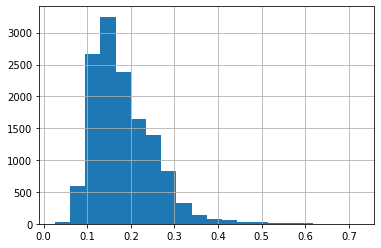

In [220]:
df['kitchen_to_total'] = df['kitchen_area']/df['total_area']
df['kitchen_to_total'].hist(bins=20)
df['kitchen_to_total'].describe()

Межквартильный размах небольшой, распределение нормальное.

Заполним пропуски в столбце **kitchen_area**, умножив медиану **kitchen_to_total** на общую площадь квартиры.
Затем, дозаполним столбец **kitchen_to_total** по вновь появившимся значениям.

In [221]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * df['kitchen_to_total'].median())
df['kitchen_to_total'] = df['kitchen_to_total'].fillna(df['kitchen_area']/df['total_area'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14431 entries, 0 to 23698
Data columns (total 24 columns):
total_images            14431 non-null int64
last_price              14431 non-null float64
total_area              14431 non-null float64
first_day_exposition    14431 non-null datetime64[ns]
rooms                   14431 non-null int64
ceiling_height          14431 non-null float64
floors_total            14431 non-null float64
living_area             14431 non-null float64
floor                   14431 non-null int64
is_apartment            1848 non-null object
studio                  14431 non-null bool
open_plan               14431 non-null bool
kitchen_area            14431 non-null float64
balcony                 14431 non-null float64
locality_name           14431 non-null object
airports_nearest        11487 non-null float64
cityCenters_nearest     11507 non-null float64
parks_around3000        11508 non-null float64
parks_nearest           5266 non-null float64
ponds_a

Данные заполнены.

Теперь добавим новый столбец **floor_type**, где запишем данные об этаже: **первый**, **последний** или **другой**. Для этого создадим функцию одной строки. В ней так же учтём те случаи, когда квартира продавалась в одноэтажном доме. Он ведь и не первый и не последний. Он **другой**.

In [222]:
def floor_categor(row):
    if row['floor'] == 1 and row['floors_total'] > 1:
        return 'первый'
    elif row['floors_total'] > 1 and row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'


df['floor_type'] = df.apply(floor_categor, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14431 entries, 0 to 23698
Data columns (total 25 columns):
total_images            14431 non-null int64
last_price              14431 non-null float64
total_area              14431 non-null float64
first_day_exposition    14431 non-null datetime64[ns]
rooms                   14431 non-null int64
ceiling_height          14431 non-null float64
floors_total            14431 non-null float64
living_area             14431 non-null float64
floor                   14431 non-null int64
is_apartment            1848 non-null object
studio                  14431 non-null bool
open_plan               14431 non-null bool
kitchen_area            14431 non-null float64
balcony                 14431 non-null float64
locality_name           14431 non-null object
airports_nearest        11487 non-null float64
cityCenters_nearest     11507 non-null float64
parks_around3000        11508 non-null float64
parks_nearest           5266 non-null float64
ponds_a

Добавлен успешно.

Теперь добавим столбец со стоимостью одного квадратного метра, днем недели, месяцем и годом объявления. 

Добавляю номера дня и месяца, чтобы можно было строить гистограмму и искать зависимость.

In [223]:
df['price_per_meter'] = df['last_price']/df['total_area']
df['week_day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14431 entries, 0 to 23698
Data columns (total 29 columns):
total_images            14431 non-null int64
last_price              14431 non-null float64
total_area              14431 non-null float64
first_day_exposition    14431 non-null datetime64[ns]
rooms                   14431 non-null int64
ceiling_height          14431 non-null float64
floors_total            14431 non-null float64
living_area             14431 non-null float64
floor                   14431 non-null int64
is_apartment            1848 non-null object
studio                  14431 non-null bool
open_plan               14431 non-null bool
kitchen_area            14431 non-null float64
balcony                 14431 non-null float64
locality_name           14431 non-null object
airports_nearest        11487 non-null float64
cityCenters_nearest     11507 non-null float64
parks_around3000        11508 non-null float64
parks_nearest           5266 non-null float64
ponds_a

# Шаг 4. *Исследовательский анализ данных*

Теперь взглянем на описание и гистограмму цены квартир.

In [224]:
def print_hists(column, rang, bins):
    print('Описание столбца', column)
    print()
    print(df[column].describe())
    print()
    print('Гистограмма частот')
    df[column].hist(range=rang, bins=bins)
    plt.show()

Описание столбца last_price

count    1.443100e+04
mean     6.796639e+06
std      9.571922e+06
min      1.219000e+04
25%      3.570000e+06
50%      4.850000e+06
75%      7.000000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Гистограмма частот


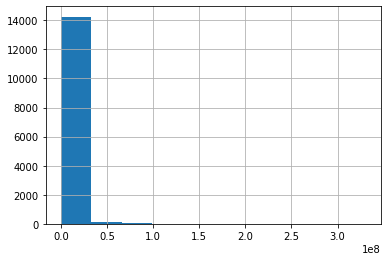

In [225]:
print_hists('last_price', (0, 330000000), 10)

Минимум и максимум сильно отличаются. Составим гистограмму для стоимости жилья до 10 млн. руб.

Описание столбца last_price

count    1.443100e+04
mean     6.796639e+06
std      9.571922e+06
min      1.219000e+04
25%      3.570000e+06
50%      4.850000e+06
75%      7.000000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Гистограмма частот


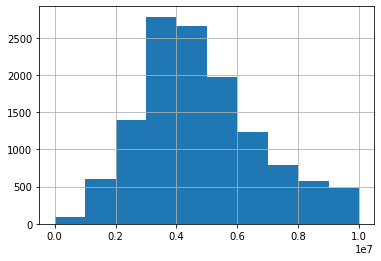

In [226]:
print_hists('last_price', (0, 10000000), 10)

Так-то лучше. Тут распределение нормальное.

Теперь взглянем на квартиры подороже. От 10 до 100 млн.

Описание столбца last_price

count    1.443100e+04
mean     6.796639e+06
std      9.571922e+06
min      1.219000e+04
25%      3.570000e+06
50%      4.850000e+06
75%      7.000000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Гистограмма частот


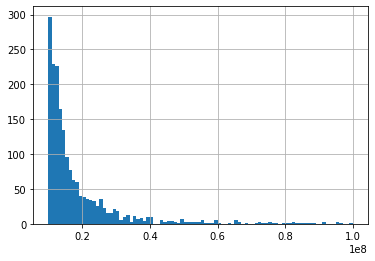

In [227]:
print_hists('last_price', (10000000, 100000000), 90)

Напоминает распределение Пуассона. Если набрать больше данных о квартирах в таком ценовом сегменте, скорее всего, распределение будет стремиться к нормальному.

Описание столбца last_price

count    1.443100e+04
mean     6.796639e+06
std      9.571922e+06
min      1.219000e+04
25%      3.570000e+06
50%      4.850000e+06
75%      7.000000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Гистограмма частот


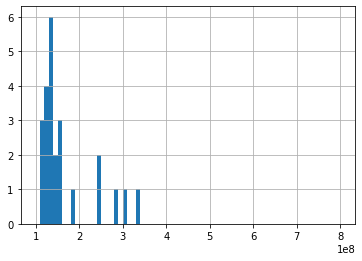

In [228]:
print_hists('last_price', (100000000, 800000000), 70)

Тут самые дорогие квартиры от 100 до 800 млн. Скорее всего это выбросы или ошибки в данных, хотя, мы знаем, что бывает и такое жильё.

Аналогичным образом взглянем на общую площадь.

Описание столбца total_area

count    14431.00000
mean        61.74017
std         35.83971
min         12.00000
25%         41.00000
50%         53.40000
75%         71.30000
max        631.20000
Name: total_area, dtype: float64

Гистограмма частот


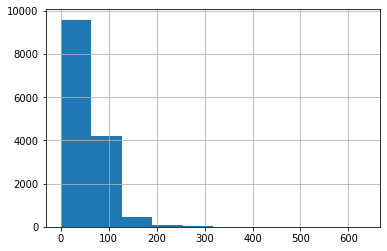

In [229]:
print_hists('total_area', (0, 635), 10)

Межквартильный размах 40 - 70 кв.м. Большая часть объявлений в пределах 200 кв. м.

Рассмотрим такую выборку, ограничив диапазон через параметр **range**.

Описание столбца total_area

count    14431.00000
mean        61.74017
std         35.83971
min         12.00000
25%         41.00000
50%         53.40000
75%         71.30000
max        631.20000
Name: total_area, dtype: float64

Гистограмма частот


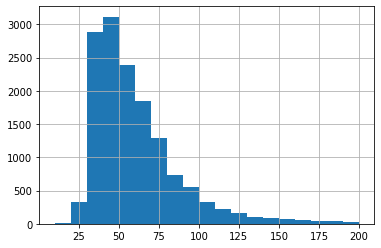

In [230]:
print_hists('total_area', (10, 200), 19)

Распределение ближе к нормальному. Однако, большая часть продаваемых квартир типична и их площадь лежит в довольно узком диапазоне.

Отдельно рассмотрим гистограмму для квартир площадью от 200 до 700 квадратных метров.

Описание столбца total_area

count    14431.00000
mean        61.74017
std         35.83971
min         12.00000
25%         41.00000
50%         53.40000
75%         71.30000
max        631.20000
Name: total_area, dtype: float64

Гистограмма частот


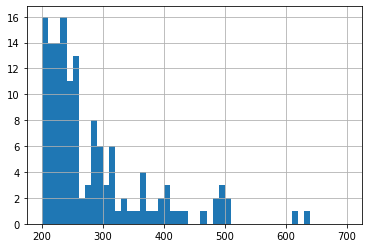

In [231]:
print_hists('total_area', (200, 700), 50)

Логично, что цена квартиры зависит от её площади. Мы увидели и огромные площади и очень дорогие квартиры, но число и тех и других было очень мало. Предполагаю, что эти огромные апартаменты которые нам попадались, и есть причина таких больших цен. В обоих случаях, 75% данных, согласно описанию к столбцу (а я думаю, ещё больше), укладываются во вполне адекватные цифры.

Большая часть лежит в диапазоне от 200 до 300 метров, другие варианты - изыск на своего клиента.

Посмотрим сколько дней требуется для продажи квартиры. Запросим описание и гистограмму.

count    11994.000000
mean       190.391779
std        228.481966
min          1.000000
25%         45.000000
50%        103.000000
75%        247.750000
max       1580.000000
Name: days_exposition, dtype: float64

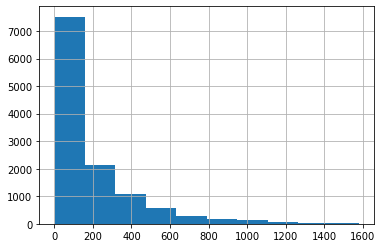

In [232]:
display(df['days_exposition'].describe())
df['days_exposition'].hist()
plt.show()

1580 дней для продажи... Слишком долго. Но раз уж такие значения есть, разобьём на 2 гистограммы 1 - до года, 2 - остальные.

Импортируем библиотеку **matplotlib** и выведем их вместе.

Объявления размещённые в течение года


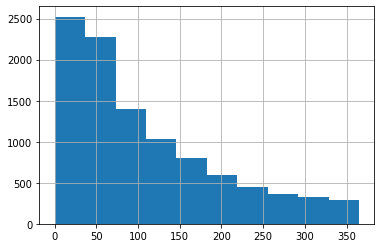

Объявления размещённые более года


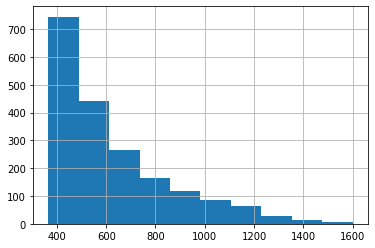

In [233]:
import matplotlib.pyplot as plt
print('Объявления размещённые в течение года')
df['days_exposition'].hist(range=(0, 365))
plt.show()
print('Объявления размещённые более года')
df['days_exposition'].hist(range=(365, 1600))
plt.show()

Судя по всему, быстрой можно назвать продажу в течение полутора-двух месяцев. Среднее время продажи квартиры - 3 месяца. Необычно долгой, можно считать продажу, которая длится более года. Хотя в наших данных не мало случаев продажи квартиры более 2-х лет. Возможна ошибка.

Далее, для обнаружения графиков зависимости создадим список и цикл который будет подставлять его значения в команду, так как везде нас интересует влияние разных факторов на одну и ту же величину - стоимость жилья. Так же запросим коэффициент корреляции между величинами.


Влияние показателя total_area на стоимость жилья:

Коэффициент корреляции 0.29198692023984374


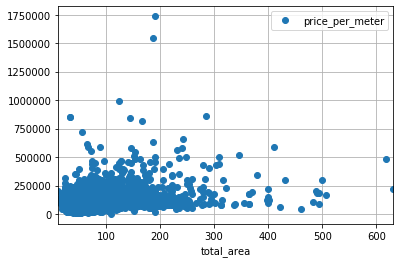


Влияние показателя rooms на стоимость жилья:

Коэффициент корреляции 0.050175174840184286


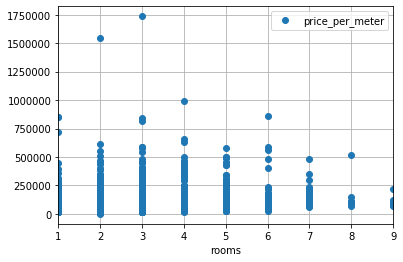


Влияние показателя cityCenters_nearest на стоимость жилья:

Коэффициент корреляции -0.3138665866653606


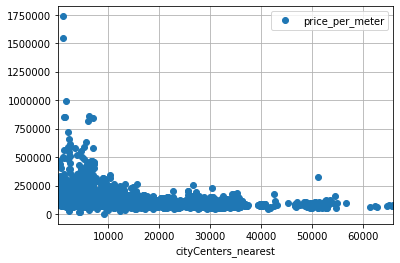


Влияние показателя week_day на стоимость жилья:

Коэффициент корреляции -0.016982372934059263


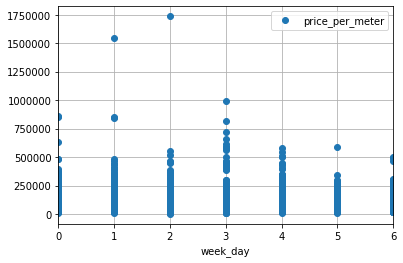


Влияние показателя month на стоимость жилья:

Коэффициент корреляции -0.009493472905399607


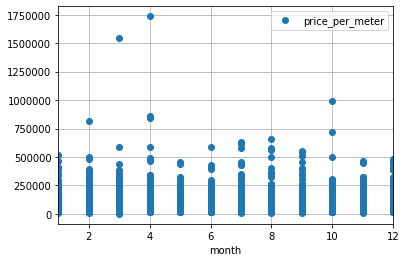


Влияние показателя year на стоимость жилья:

Коэффициент корреляции 0.02006446268996942


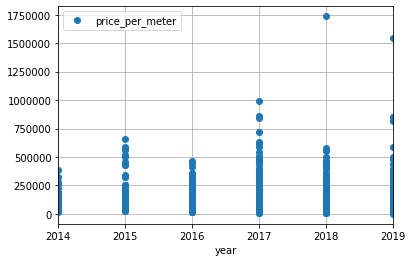

In [234]:
values = ['total_area', 'rooms', 'cityCenters_nearest', 'week_day', 'month', 'year']
for value in values:
    print()
    print('Влияние показателя', value, 'на стоимость жилья:')
    print()
    print('Коэффициент корреляции', df[value].corr(df['price_per_meter']))
    df.plot(x=value, y='price_per_meter', style='o', legend=True, grid=True)
    plt.show()

Обнаружились небольшие взаимосвязи между обще площадью жилья и ег стоимостью (прямая) и расстоянием до центра города (обратная). В остальных случаях зависимости нет. Можно отметить, что объявления о продаже более дорого жилья размещали по четвергам, и в 2017 году (может жильё тогда в целом было дороже).

Так же построим график для этажей и их влияния на стоимость.Тип данных **object**, поэтому корреляцию не расчитать.

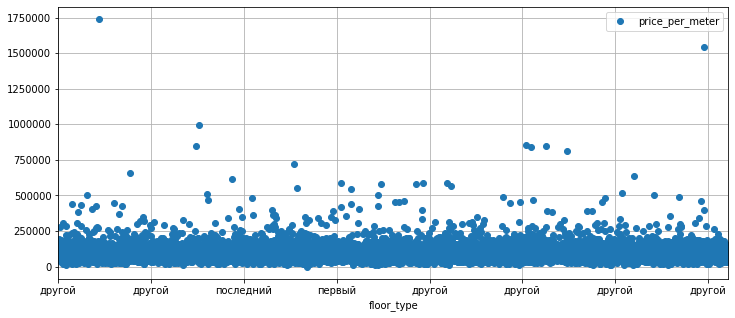

In [235]:
df.plot(x='floor_type', y='price_per_meter', style='o', figsize=(12, 5), grid=True)

График получился страный... Сгруппируем данные по типу этажей и узнаем медиану для каждого.

In [236]:
df.groupby('floor_type')['price_per_meter'].median()

floor_type
другой       100000.000000
первый        83599.492660
последний     89789.276258
Name: price_per_meter, dtype: float64

Последний этаж получился дороже первого. Но **другие** дороже всего. Наверное потому, что в этом диапазоне больше самих объявлений и, соответственно, значений.

Проверим зависимость на номерах этажей.

Влияние этажа на стоимость жилья:

Коэффициент корреляции 0.12746358531593757


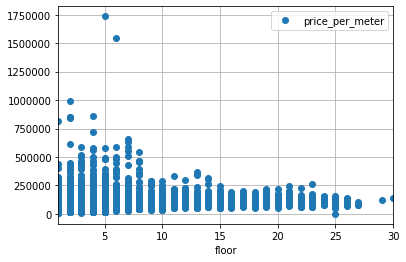

In [237]:
print('Влияние этажа на стоимость жилья:')
print()
print('Коэффициент корреляции', df['floor'].corr(df['price_per_meter']))
df.plot(x='floor', y='price_per_meter', style='o', grid=True)
plt.show()

Зависимость очень слабая. И то для первых 9-ти этажей.

Теперь, создадим сводную таблицу для городов где больше всего объявлений. Возьмём значение **rooms** для подсчёта количества объявлений, и **price_per_meter** для расчёта медиан в каждом городе. Отсортируем поубыванию и выберем первые 10 строк и присвоим в новую таблицу **most_popular_cities**.

In [238]:
most_popular_cities = df.pivot_table(index='locality_name', values=['rooms', 'price_per_meter'], aggfunc={'rooms':'count', 'price_per_meter':'median'}).sort_values('rooms', ascending=False).head(10)
display(most_popular_cities)

,price_per_meter,rooms
locality_name,,
Санкт-Петербург,105714.285714,10056
Всеволожск,65789.473684,271
Пушкин,100000.000000,234
посёлок Шушары,77735.849057,215
Колпино,74725.274725,203
посёлок Мурино,86157.557209,198
Гатчина,68979.744936,148
Петергоф,82142.857143,145
посёлок Парголово,91040.462428,137


Больше всего объявлений в Питере, это и понятно. Распечатаем ответ на вопрос о самой дорогой и самой дешёвой недвижимости в самых популярных городах.

In [239]:
print('Самые высокие цены на недвижимость -', most_popular_cities[most_popular_cities['price_per_meter'] == most_popular_cities['price_per_meter'].max()].index[0])
print('Самые низкие цены на недвижимость -', most_popular_cities[most_popular_cities['price_per_meter'] == most_popular_cities['price_per_meter'].min()].index[0])

Самые высокие цены на недвижимость - Санкт-Петербург
Самые низкие цены на недвижимость - Всеволожск


Теперь, выберем из таблицы только данные по Санкт-Петербургу, добавим столбец с расстоянием до центра города в километрах, затем округлим эти значения.

In [240]:
spb_only = df[df['locality_name'] == 'Санкт-Петербург']
spb_only.loc[:,'to_center_km'] = (spb_only.loc[:,'cityCenters_nearest']/1000).round()

Теперь создадимсводную таблицу, рассчитаем среднюю стоимость квадратного метра на каждом километре расстояния и построим график зависимости между расстоянием и ценой. Через **figsize** передадим больший размер.

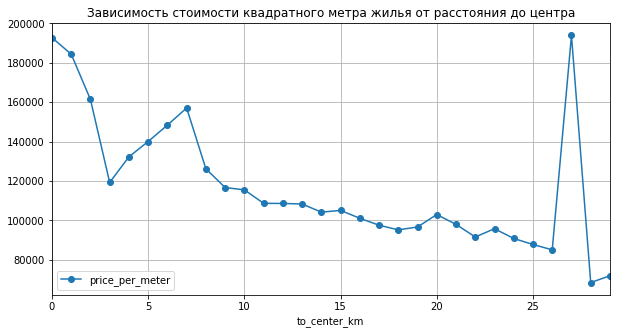

In [241]:
spb_only.pivot_table(index='to_center_km', values='price_per_meter').plot(title='Зависимость стоимости квадратного метра жилья от расстояния до центра', style='o-', figsize=(10, 5), grid=True)

Судя по графику, ситуация сильно менется при приближении к центру ближе 8 километров, потом она, почему-то, немного снижается (может это старые ветхие дома), затем опять идёт строго вверх. Итого, границу центра города определяем в 8 километров.

## Теперь рассмотрим цетр Санкт-Петербурга

Отберём те записи, в которых расстояние до центра меньше или равно 7-ми километрам.

In [242]:
spb_only_center = spb_only[spb_only['to_center_km'] <= 8]

Рассмотрим гистограммы для некоторых параметров. И сравним с общей картиной по всем имеющимся данным. Сначала опишем функцию, в которую будем передавать столбец.

In [243]:
def spb_count(column):
    spb_only_center['total_area'].hist()
    print()
    print('Описание значений в столбце', column)
    print()
    print(spb_only_center['total_area'].describe())
    print()
    print('Гистограмма частот по столбцу', column)

Начнём с общей площади.


Описание значений в столбце total_area

count    2666.000000
mean       91.582202
std        57.080774
min        12.000000
25%        56.000000
50%        77.000000
75%       109.075000
max       631.200000
Name: total_area, dtype: float64

Гистограмма частот по столбцу total_area


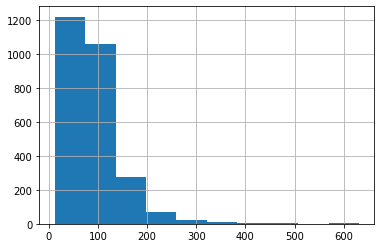

In [244]:
spb_count('total_area')

Площадь квартир увеличилась. Теперь медиана 78 вместо 52.


Описание значений в столбце last_price

count    2666.000000
mean       91.582202
std        57.080774
min        12.000000
25%        56.000000
50%        77.000000
75%       109.075000
max       631.200000
Name: total_area, dtype: float64

Гистограмма частот по столбцу last_price


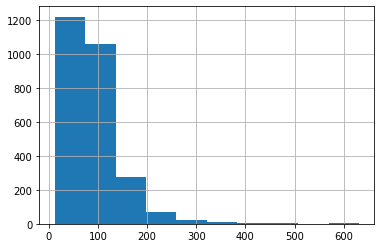

In [245]:
spb_count('last_price')

Стоимость квартир сильно выше (ещё бы, центр Питера).


Описание значений в столбце rooms

count    2666.000000
mean       91.582202
std        57.080774
min        12.000000
25%        56.000000
50%        77.000000
75%       109.075000
max       631.200000
Name: total_area, dtype: float64

Гистограмма частот по столбцу rooms


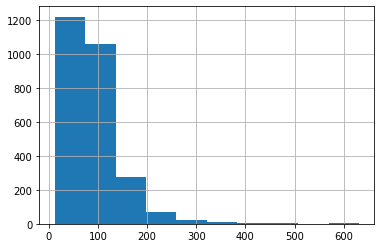

In [246]:
spb_count('rooms')

Комнат так же больше. В среднем 3, а было 2.


Описание значений в столбце ceiling_height

count    2666.000000
mean       91.582202
std        57.080774
min        12.000000
25%        56.000000
50%        77.000000
75%       109.075000
max       631.200000
Name: total_area, dtype: float64

Гистограмма частот по столбцу ceiling_height


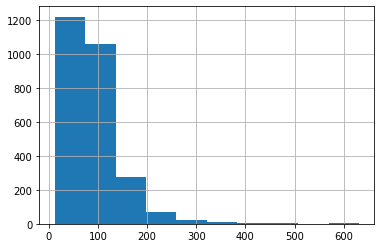

In [247]:
spb_count('ceiling_height')

Высота потолков в Питере так же выше - 2,8 против 2,65.

Так же проверим зависимость стоимости жилья от этажа квартиры.

Влияние этажа на стоимость жилья:

Коэффициент корреляции 0.09276628211091806


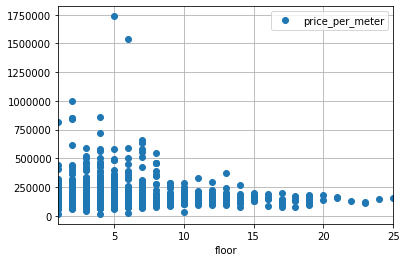

In [248]:
print('Влияние этажа на стоимость жилья:')
print()
print('Коэффициент корреляции', spb_only_center['floor'].corr(spb_only_center['price_per_meter']))
spb_only_center.plot(x='floor', y='price_per_meter', style='o', grid=True)
plt.show()

Коэффициент практически не изменился. На графике видно, что прямая зависимость существует, примерно, до 8 этажа. Далее не ощущается.

Теперь, аналогично, через цикл отследим зависимость между стоимостью жилья и другими параметрами, так же сравнив с информацией по всем данным. Для нагляднсти, выведем коэффициент корреляции так же для всех данных.


Влияние показателя total_area на стоимость жилья:

Коэффициент корреляции в выборке 0.2205070134222273
Коэффициент корреляции в целом по даным 0.29198692023984374


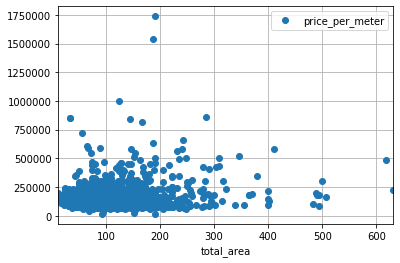


Влияние показателя rooms на стоимость жилья:

Коэффициент корреляции в выборке -0.01545462814701525
Коэффициент корреляции в целом по даным 0.050175174840184286


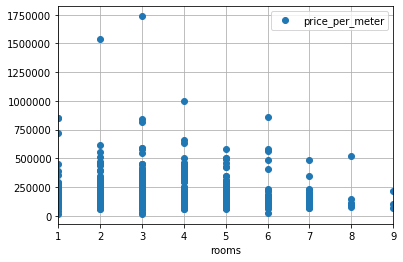


Влияние показателя cityCenters_nearest на стоимость жилья:

Коэффициент корреляции в выборке -0.06963684404749923
Коэффициент корреляции в целом по даным -0.3138665866653606


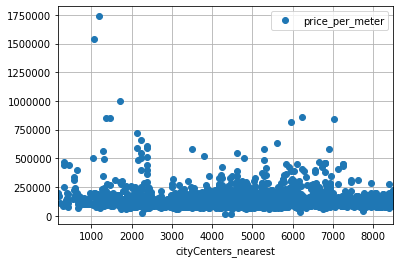


Влияние показателя week_day на стоимость жилья:

Коэффициент корреляции в выборке -0.002347235784603529
Коэффициент корреляции в целом по даным -0.016982372934059263


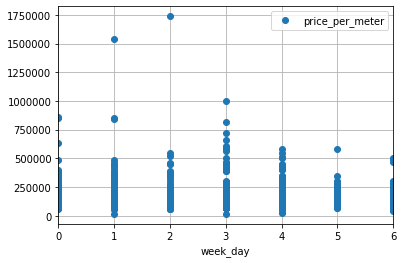


Влияние показателя month на стоимость жилья:

Коэффициент корреляции в выборке -0.024469420792934203
Коэффициент корреляции в целом по даным -0.009493472905399607


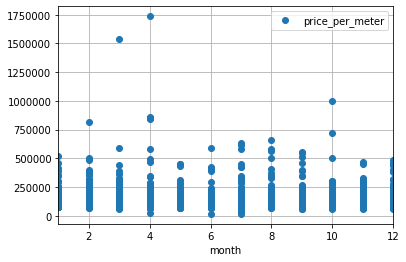


Влияние показателя year на стоимость жилья:

Коэффициент корреляции в выборке 0.012956809182672183
Коэффициент корреляции в целом по даным 0.02006446268996942


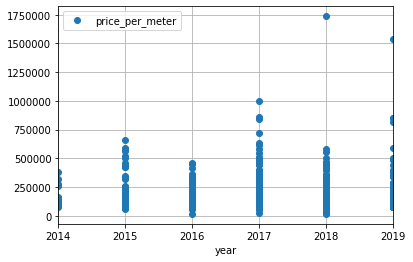

In [249]:
for value in values:
    print()
    print('Влияние показателя', value, 'на стоимость жилья:')
    print()
    print('Коэффициент корреляции в выборке', spb_only_center[value].corr(spb_only_center['price_per_meter']))
    print('Коэффициент корреляции в целом по даным', df[value].corr(df['price_per_meter']))
    spb_only_center.plot(x=value, y='price_per_meter', style='o', legend=True, grid=True)
    plt.show()

Общая площадь жилья в центре Санкт-Петербура влияет на стоимость меньше, чем во всем наборе данных. Расстояние до центра города уже перестаёт играть роль, количество комнат в квартире так же ещё меньше влияет на стоимость квадратного метра. По другим параметрам разница ничтожно мала, как и сами коэффициенты корреляции.

# Шаг 5. *Общий вывод*

Полученные данные были неоднородны, в них содержалось много артефактов, но часто это были, скорее, реальные значения, которые приходилось отбрасывать, так как они сильно отличались от абсолютного большинства данных, и могли влиять на расчёты.

В ходе работы мы:

- проверили датафрейм на наличие дубликатов,
- заполнили пропуски балконов нулями,
- отбросили слишком уж высокие и низкие потолки,
- пропуски для высоты потолков заполнили медианой,
- отбросили жилую площадь менее 9 квадратных метров,
- рассчитали среднюю площадь комнаты и с помощью этого коэффициента заполнили пропуски в столбце **living_area**,
- удалили неправдоподобно высокие здания в 60 и 52 этажа,
- проверили записи с 0 комнат, они оказались студиями или открытой планировкой, заменили их значения на 1,
- отбросили записи с количеством комнат более 9-ти, так как они были слишком редки и едва ли правдоподобны (на мой взгляд),
- рассчитали соотношение жилой площади к общей и добавили столбец,
- рассчитали соотношение площади кухни к общей и добавили столбец,
- добавили столбцы с днём недели, месяцем и годом объявления,

- изучили гистограммы для стоимости квартир, их площади, сроку продажи, высоте потолков, количеству комнат,
- изучили зависимость стоимости квартиры от её площади, расстояния до центра города, количества комнат, даты публикации,
- выделили квартиры в Санк-Петербурге, рассчитали для них расстояние до центра города в километрах, на графике нашли точку после которой стоимость начала значительно возрастать, таким образом определив границы центра города,
- для квартир в центре Санкт-Петербурга изучили те же взаимосвязи, что и для всех квартир в наборе данных.